# ML Driven Anomaly Detection  for IoT Edge Devices: Insights from ADMM-Based Frequency Management


In [1]:
# Importing Libraries

In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


## Importing dataset

In [43]:
dataset = pd.read_csv(r"dataset.csv")
dataset

,frequency1,frequency2,frequency3,aux1,aux2,aux3,dual1,dual2,dual3,max_freq,capacity,request1,anomaly
0,1.932433,2.333266,1.649085,2.452955,2.614049,1.450389,0.479478,0.719218,1.198696,10.0,20.0,2.0,0
1,2.128282,3.298276,1.714643,1.984882,3.083175,1.356142,0.622879,0.934318,1.557197,10.0,20.0,2.0,0
2,2.089229,3.382951,1.691158,1.942750,3.163233,1.324961,0.769358,1.154037,1.923394,10.0,20.0,2.0,0
3,2.077075,3.336398,1.670322,1.944710,3.137849,1.339407,0.901724,1.352585,2.254309,10.0,20.0,2.0,0
4,2.068626,3.261754,1.653639,1.953326,3.088803,1.365388,1.017024,1.525536,2.542560,10.0,20.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0,0
29995,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0,0
29996,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0,0
29997,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0,0


In [44]:
dataset.head()

,frequency1,frequency2,frequency3,aux1,aux2,aux3,dual1,dual2,dual3,max_freq,capacity,request1,anomaly
0,1.932433,2.333266,1.649085,2.452955,2.614049,1.450389,0.479478,0.719218,1.198696,10.0,20.0,2.0,0
1,2.128282,3.298276,1.714643,1.984882,3.083175,1.356142,0.622879,0.934318,1.557197,10.0,20.0,2.0,0
2,2.089229,3.382951,1.691158,1.942750,3.163233,1.324961,0.769358,1.154037,1.923394,10.0,20.0,2.0,0
3,2.077075,3.336398,1.670322,1.944710,3.137849,1.339407,0.901724,1.352585,2.254309,10.0,20.0,2.0,0
4,2.068626,3.261754,1.653639,1.953326,3.088803,1.365388,1.017024,1.525536,2.542560,10.0,20.0,2.0,0


In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 13 columns):
frequency1    29999 non-null float64
frequency2    29999 non-null float64
frequency3    29999 non-null float64
aux1          29999 non-null float64
aux2          29999 non-null float64
aux3          29999 non-null float64
dual1         29999 non-null float64
dual2         29999 non-null float64
dual3         29999 non-null float64
max_freq      29999 non-null float64
capacity      29999 non-null float64
request1      29999 non-null float64
anomaly       29999 non-null int64
dtypes: float64(12), int64(1)
memory usage: 3.0 MB


In [46]:
dataset.isnull().sum()

frequency1    0
frequency2    0
frequency3    0
aux1          0
aux2          0
aux3          0
dual1         0
dual2         0
dual3         0
max_freq      0
capacity      0
request1      0
anomaly       0
dtype: int64

In [47]:
# Defining Dependent and independent variables

In [48]:


X= dataset.iloc[:,0:12]
X

,frequency1,frequency2,frequency3,aux1,aux2,aux3,dual1,dual2,dual3,max_freq,capacity,request1
0,1.932433,2.333266,1.649085,2.452955,2.614049,1.450389,0.479478,0.719218,1.198696,10.0,20.0,2.0
1,2.128282,3.298276,1.714643,1.984882,3.083175,1.356142,0.622879,0.934318,1.557197,10.0,20.0,2.0
2,2.089229,3.382951,1.691158,1.942750,3.163233,1.324961,0.769358,1.154037,1.923394,10.0,20.0,2.0
3,2.077075,3.336398,1.670322,1.944710,3.137849,1.339407,0.901724,1.352585,2.254309,10.0,20.0,2.0
4,2.068626,3.261754,1.653639,1.953326,3.088803,1.365388,1.017024,1.525536,2.542560,10.0,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29994,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0
29995,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0
29996,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0
29997,2.021158,2.722884,1.557806,2.021158,2.722884,1.557806,1.702881,2.554322,4.257203,10.0,20.0,2.0


In [49]:
y= dataset.iloc[:, -1]
y

0        0
1        0
2        0
3        0
4        0
        ..
29994    0
29995    0
29996    0
29997    0
29998    0
Name: anomaly, Length: 29999, dtype: int64

In [50]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X,y= smote.fit_resample(X, y)

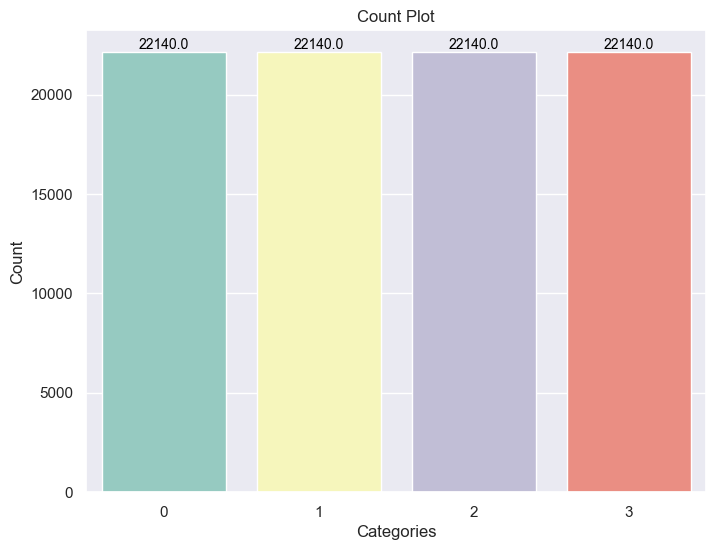

In [51]:
# Create a count plot
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size
# Replace 'dataset' with your actual DataFrame and 'Drug' with the column name
ax = sns.countplot(x=y,palette="Set3")
plt.title("Count Plot")  # Add a title to the plot
plt.xlabel("Categories")  # Add label to x-axis
plt.ylabel("Count")  # Add label to y-axis
# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()  # Display the plot

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#Feature scaling

In [54]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [55]:
X_train.shape

(61992, 12)

In [56]:
X_test.shape

(26568, 12)

In [57]:
labels = ["0","1","2","3"]

In [58]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [59]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Logistic Regresssion

LogisticRegression Accuracy    : 70.3026196928636
LogisticRegression Precision   : 73.52199346086795
LogisticRegression Recall      : 70.15566141429663
LogisticRegression FSCORE      : 68.59927306281557

 LogisticRegression classification report
               precision    recall  f1-score   support

           0       0.94      0.57      0.71     10965
           1       0.83      0.75      0.79      7578
           2       0.72      0.96      0.82      4945
           3       0.31      0.67      0.43      3080

    accuracy                           0.70     26568
   macro avg       0.70      0.74      0.69     26568
weighted avg       0.80      0.70      0.72     26568



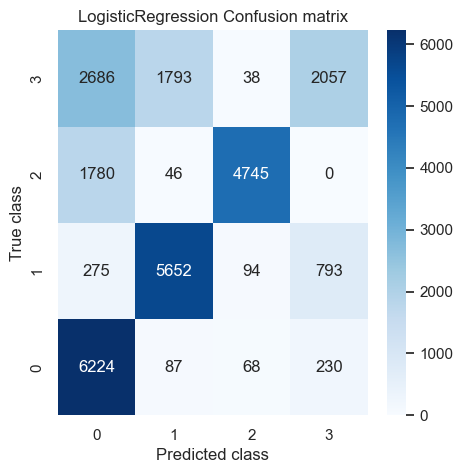

In [60]:
# Check if the pkl file exists
if os.path.exists('LogisticRegression_weights.pkl'):
    # Load the model from the pkl file
    rf_classifier= joblib.load('LogisticRegression_weights.pkl')
    predict = rf_classifier.predict(X_test)
    calculateMetrics("LogisticRegression", predict, y_test)
else:
    clf = LogisticRegression()
    # Train the classifier on the training data
    clf.fit(X_train, y_train)
    # Make predictions on the test data
    predict=clf.predict(X_test)
    joblib.dump(clf, 'LogisticRegression_weights.pkl')
    print("LogisticRegression model trained and model weights saved.")
    calculateMetrics("LogisticRegression", predict, y_test)

# Decisiontree with AdaBoost Classifier

AdaBoost Decision Tree Accuracy    : 90.15733212887685
AdaBoost Decision Tree Precision   : 90.30244555767295
AdaBoost Decision Tree Recall      : 90.25977959165041
AdaBoost Decision Tree FSCORE      : 90.2121877281943

 AdaBoost Decision Tree classification report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      6729
           1       0.78      0.85      0.81      6257
           2       0.99      1.00      0.99      6491
           3       0.85      0.78      0.81      7091

    accuracy                           0.90     26568
   macro avg       0.90      0.90      0.90     26568
weighted avg       0.90      0.90      0.90     26568



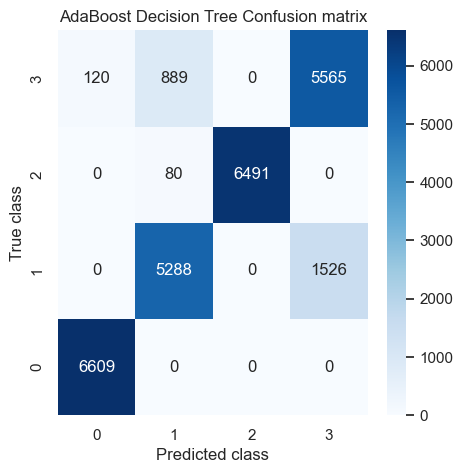

In [61]:
import os
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Check if the model file exists
if os.path.exists('adaboost_tree.pkl'):
    # Load the pre-trained model
    classifier = joblib.load('adaboost_tree.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("AdaBoost Decision Tree", predict, y_test)
else:
    # Initialize the base Decision Tree and AdaBoost Classifier
    base_tree = DecisionTreeClassifier(max_depth=45)
    classifier = AdaBoostClassifier(base_estimator=base_tree, n_estimators=200, learning_rate=3.0)

    # Train the classifier on the training data
    classifier.fit(X_train, y_train)

    # Make predictions on the test data
    predict = classifier.predict(X_test)

    # Save the model weights to a pkl file
    joblib.dump(classifier, 'adaboost_tree.pkl')
    print("AdaBoost Decision Tree model trained and model weights saved.")

    calculateMetrics("AdaBoost Decision Tree", predict, y_test)


In [62]:
#Performance Comparision of both the algorithmns

In [63]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["LogisticRegression","DTC with AdaBoost Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,LogisticRegression,73.521993,70.155661,68.599273,70.302620
1,DTC with AdaBoost Classifier,90.302446,90.259780,90.212188,90.157332


In [64]:
#Prediction onnew test data

In [65]:
test=pd.read_csv("test.csv")
test

,frequency1,frequency2,frequency3,aux1,aux2,aux3,dual1,dual2,dual3,max_freq,capacity,request1
0,1.932433,2.333266,1.649085,2.452955,2.614049,1.450389,0.479478,0.719218,1.198696,10,20,2.000000
1,2.128282,3.298276,1.714643,1.984882,3.083175,1.356142,0.622879,0.934318,1.557197,10,20,2.000000
2,2.089229,3.382951,1.691158,1.942750,3.163233,1.324961,0.769358,1.154037,1.923394,10,20,2.000000
3,2.077075,3.336398,1.670322,1.944710,3.137849,1.339407,0.901724,1.352585,2.254309,10,20,2.000000
4,2.068626,3.261754,1.653639,1.953326,3.088803,1.365388,1.017024,1.525536,2.542560,10,20,2.000000
5,2.061694,3.187756,1.639754,1.962461,3.038907,1.391672,1.116257,1.674386,2.790643,10,20,2.000000
6,2.055823,3.121509,1.627948,1.970775,2.993937,1.415328,1.201305,1.801958,3.003263,10,20,2.000000
7,2.050809,3.063996,1.617854,1.978026,2.954822,1.435897,1.274088,1.911132,3.185220,10,20,2.000000
8,3.062832,2.722891,1.557799,2.953183,2.558418,1.283676,1.812530,2.718795,4.531326,10,20,2.000000
9,3.118312,2.613189,1.527792,3.028041,2.477782,1.302114,1.902801,2.854202,4.757004,10,20,2.000000


In [66]:
# Make predictions on the selected test data
predict = classifier.predict(test)

# Loop through each prediction and print the corresponding row
for i, p in enumerate(predict):
    print(test.iloc[i])  # Print the row
    print(f"Row {i}:************************************************** {labels[p]}")

frequency1     1.932433
frequency2     2.333266
frequency3     1.649085
aux1           2.452955
aux2           2.614049
aux3           1.450389
dual1          0.479478
dual2          0.719218
dual3          1.198696
max_freq      10.000000
capacity      20.000000
request1       2.000000
Name: 0, dtype: float64
Row 0:************************************************** 1
frequency1     2.128282
frequency2     3.298276
frequency3     1.714643
aux1           1.984882
aux2           3.083175
aux3           1.356142
dual1          0.622879
dual2          0.934318
dual3          1.557197
max_freq      10.000000
capacity      20.000000
request1       2.000000
Name: 1, dtype: float64
Row 1:************************************************** 1
frequency1     2.089229
frequency2     3.382951
frequency3     1.691158
aux1           1.942750
aux2           3.163233
aux3           1.324961
dual1          0.769358
dual2          1.154037
dual3          1.923394
max_freq      10.000000
capacity      20.0

In [67]:
test['Predicted'] = [labels[p] for p in predict]

In [68]:
test

,frequency1,frequency2,frequency3,aux1,aux2,aux3,dual1,dual2,dual3,max_freq,capacity,request1,Predicted
0,1.932433,2.333266,1.649085,2.452955,2.614049,1.450389,0.479478,0.719218,1.198696,10,20,2.000000,1
1,2.128282,3.298276,1.714643,1.984882,3.083175,1.356142,0.622879,0.934318,1.557197,10,20,2.000000,1
2,2.089229,3.382951,1.691158,1.942750,3.163233,1.324961,0.769358,1.154037,1.923394,10,20,2.000000,1
3,2.077075,3.336398,1.670322,1.944710,3.137849,1.339407,0.901724,1.352585,2.254309,10,20,2.000000,1
4,2.068626,3.261754,1.653639,1.953326,3.088803,1.365388,1.017024,1.525536,2.542560,10,20,2.000000,1
5,2.061694,3.187756,1.639754,1.962461,3.038907,1.391672,1.116257,1.674386,2.790643,10,20,2.000000,1
6,2.055823,3.121509,1.627948,1.970775,2.993937,1.415328,1.201305,1.801958,3.003263,10,20,2.000000,1
7,2.050809,3.063996,1.617854,1.978026,2.954822,1.435897,1.274088,1.911132,3.185220,10,20,2.000000,1
8,3.062832,2.722891,1.557799,2.953183,2.558418,1.283676,1.812530,2.718795,4.531326,10,20,2.000000,1
9,3.118312,2.613189,1.527792,3.028041,2.477782,1.302114,1.902801,2.854202,4.757004,10,20,2.000000,1
